# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kilgore
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | marsabit
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | moroni
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | holualoa
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | mamuju
Processing Record 11 of Set 1 | gasa
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | siuna
Processing Record 15 of Set 1 | urucara
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | irthlingborough
Processing Record 19 of Set 1 | lai chau
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | arkhangel'sk
Processing Record 22 of Set 1 | tolanaro
Processing 

Processing Record 38 of Set 4 | callao
Processing Record 39 of Set 4 | ola
Processing Record 40 of Set 4 | barentu
Processing Record 41 of Set 4 | warrnambool
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | dazhou
Processing Record 44 of Set 4 | nanao
Processing Record 45 of Set 4 | khandyga
Processing Record 46 of Set 4 | yatou
Processing Record 47 of Set 4 | nova sintra
Processing Record 48 of Set 4 | igarka
Processing Record 49 of Set 4 | tobelo
Processing Record 0 of Set 5 | avarua
Processing Record 1 of Set 5 | san antonio de pale
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | lib
Processing Record 4 of Set 5 | caconda
Processing Record 5 of Set 5 | malanje
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | peace river
Processing Record 9 of Set 5 | beltran
Processing Record 10 of Set 5 | shakhun'ya
Processing Record 11 of Set 5 | tulun
Processing Record 12 of Set

Processing Record 31 of Set 8 | kirensk
Processing Record 32 of Set 8 | jinghong
Processing Record 33 of Set 8 | masterton
Processing Record 34 of Set 8 | labytnangi
Processing Record 35 of Set 8 | cable beach
City not found. Skipping...
Processing Record 36 of Set 8 | yarmouth
Processing Record 37 of Set 8 | miramichi
Processing Record 38 of Set 8 | zunyi
Processing Record 39 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 8 | bikenibeu village
Processing Record 41 of Set 8 | boende
Processing Record 42 of Set 8 | yeraliyev
Processing Record 43 of Set 8 | bermejo
Processing Record 44 of Set 8 | yangor
City not found. Skipping...
Processing Record 45 of Set 8 | doka
Processing Record 46 of Set 8 | skowhegan
Processing Record 47 of Set 8 | ulladulla
Processing Record 48 of Set 8 | sastre
Processing Record 49 of Set 8 | yeed
Processing Record 0 of Set 9 | kulhudhuffushi
Processing Record 1 of Set 9 | kolobrzeg
Processing Record 2 of Set 9 | mcpherson
Process

Processing Record 20 of Set 12 | saudarkrokur
Processing Record 21 of Set 12 | isangel
Processing Record 22 of Set 12 | pacific grove
Processing Record 23 of Set 12 | arauco
Processing Record 24 of Set 12 | tobruk
Processing Record 25 of Set 12 | kariba
Processing Record 26 of Set 12 | iglino
Processing Record 27 of Set 12 | hilo
Processing Record 28 of Set 12 | mazan
Processing Record 29 of Set 12 | coquimbo
Processing Record 30 of Set 12 | concepcion
Processing Record 31 of Set 12 | taksimo
Processing Record 32 of Set 12 | awjilah
Processing Record 33 of Set 12 | charles city
Processing Record 34 of Set 12 | singaraja
Processing Record 35 of Set 12 | hami
Processing Record 36 of Set 12 | shanwei
Processing Record 37 of Set 12 | neufchatel-en-bray
Processing Record 38 of Set 12 | mubende
Processing Record 39 of Set 12 | san andres
Processing Record 40 of Set 12 | kyshtovka
Processing Record 41 of Set 12 | sutton coldfield
Processing Record 42 of Set 12 | lycksele
Processing Record 43 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kilgore,32.3863,-94.8758,27.16,65,40,3.09,US,1726372153
1,enewetak,11.3474,162.3373,29.19,77,100,6.35,MH,1726372154
2,marsabit,2.3284,37.9899,16.06,61,19,8.25,KE,1726372156
3,whitehorse,60.7161,-135.0538,9.89,63,81,1.34,CA,1726372056
4,port-aux-francais,-49.3500,70.2167,0.56,63,90,14.13,TF,1726372158
5,moroni,-11.7022,43.2551,24.79,75,1,1.44,KM,1726372159
6,touros,-5.1989,-35.4608,22.06,86,1,5.08,BR,1726372160
7,holualoa,19.6228,-155.9522,24.03,89,48,1.46,US,1726372161
8,iqaluit,63.7506,-68.5145,3.85,80,20,0.00,CA,1726372162
9,mamuju,-2.6748,118.8885,29.40,62,98,1.71,ID,1726372163


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kilgore,32.3863,-94.8758,27.16,65,40,3.09,US,1726372153
1,enewetak,11.3474,162.3373,29.19,77,100,6.35,MH,1726372154
2,marsabit,2.3284,37.9899,16.06,61,19,8.25,KE,1726372156
3,whitehorse,60.7161,-135.0538,9.89,63,81,1.34,CA,1726372056
4,port-aux-francais,-49.3500,70.2167,0.56,63,90,14.13,TF,1726372158


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

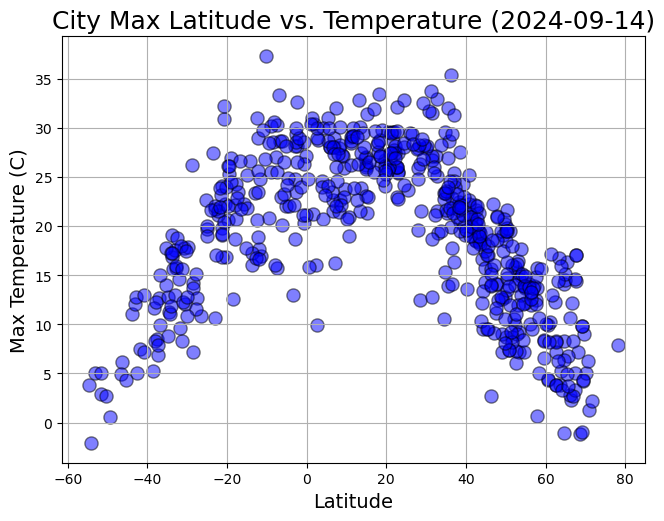

In [8]:
# Build scatter plot for latitude vs. temperature
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.tight_layout()
plt.grid(True)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.title("City Max Latitude vs. Temperature (2024-09-14)", fontsize=18)


# Save the figure
plt.savefig("output_data/Fig1_Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

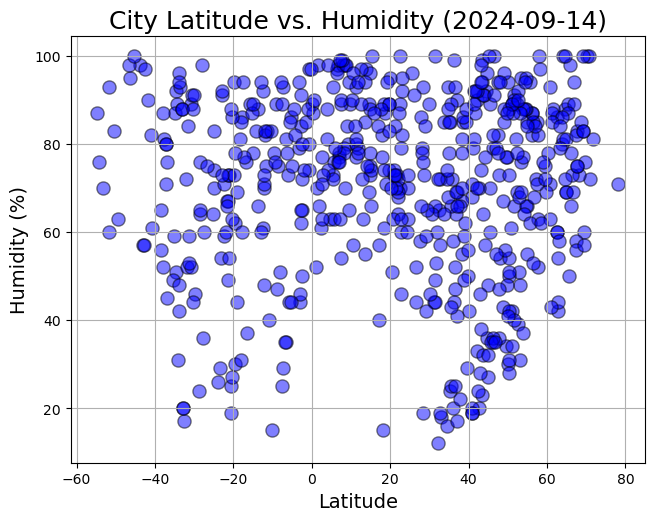

In [9]:
# Build the scatter plots for latitude vs. humidity
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)


# Incorporate the other graph properties
plt.tight_layout()
plt.grid(True)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("City Latitude vs. Humidity (2024-09-14)", fontsize=18)


# Save the figure
plt.savefig("output_data/Fig2_Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

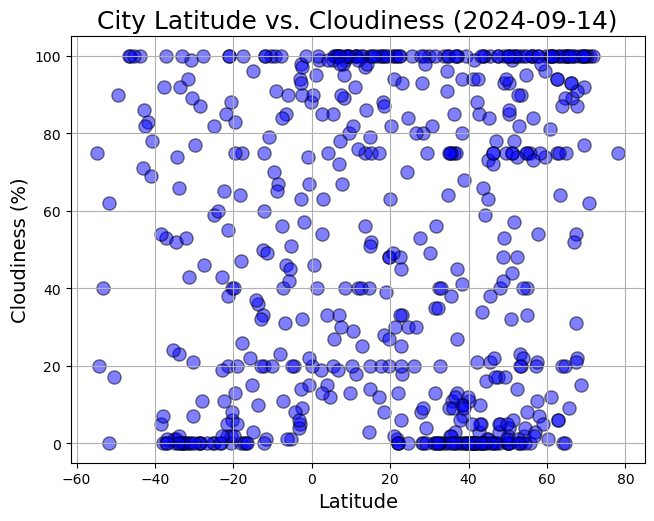

In [10]:
# Build the scatter plots for latitude vs. cloudiness
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)


# Incorporate the other graph properties
plt.tight_layout()
plt.grid(True)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("City Latitude vs. Cloudiness (2024-09-14)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3_Lat_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

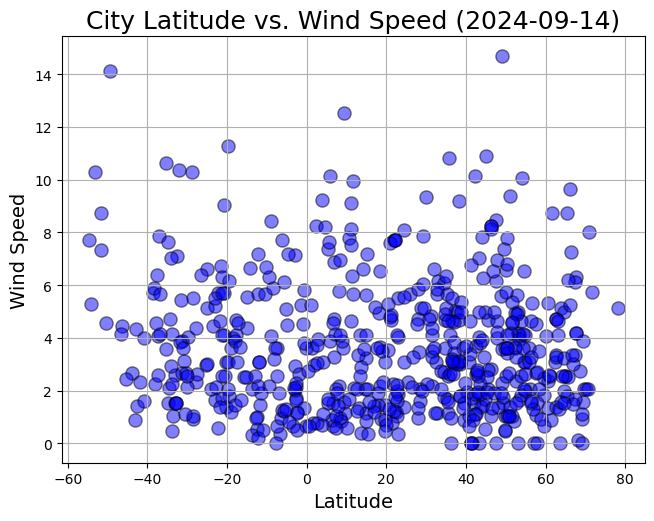

In [11]:
# Build the scatter plots for latitude vs. wind speed
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.tight_layout()
plt.grid(True)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.title("City Latitude vs. Wind Speed (2024-09-14)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4_Lat_Windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.2)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(f'{ylabel}', fontsize=46)
    plt.grid()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kilgore,32.3863,-94.8758,27.16,65,40,3.09,US,1726372153
1,enewetak,11.3474,162.3373,29.19,77,100,6.35,MH,1726372154
2,marsabit,2.3284,37.9899,16.06,61,19,8.25,KE,1726372156
3,whitehorse,60.7161,-135.0538,9.89,63,81,1.34,CA,1726372056
7,holualoa,19.6228,-155.9522,24.03,89,48,1.46,US,1726372161


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,0.56,63,90,14.13,TF,1726372158
5,moroni,-11.7022,43.2551,24.79,75,1,1.44,KM,1726372159
6,touros,-5.1989,-35.4608,22.06,86,1,5.08,BR,1726372160
9,mamuju,-2.6748,118.8885,29.40,62,98,1.71,ID,1726372163
12,port mathurin,-19.6833,63.4167,20.64,62,83,11.29,MU,1726372167


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7942593446508112


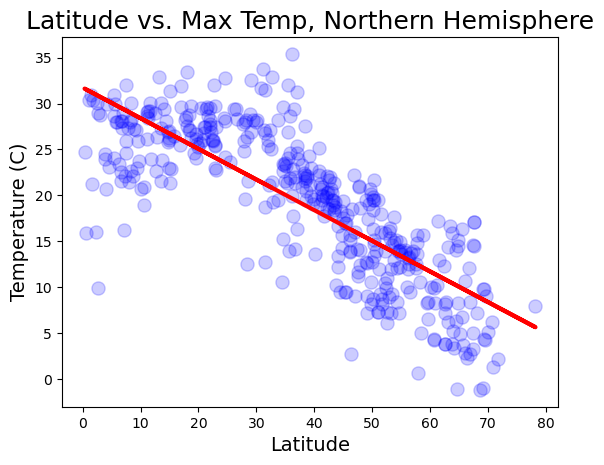

In [24]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.title("Latitude vs. Max Temp, Northern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig5_Lat_Temp_NorthRegress.png")

The r-value is 0.8064047683068859


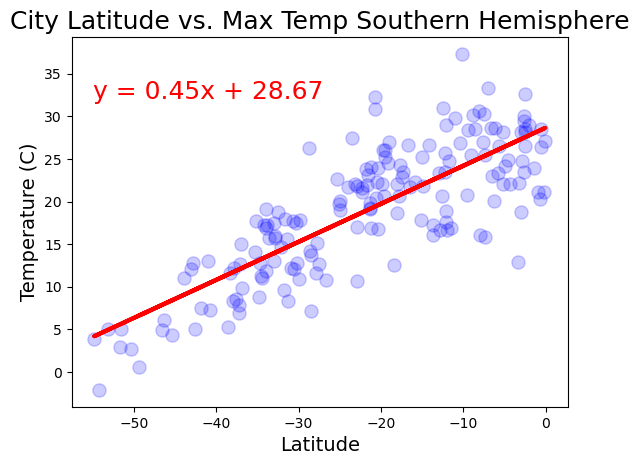

In [25]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 32, "Temperature (C)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.title("City Latitude vs. Max Temp Southern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig6_Lat_Temp_SouthRegress.png")

**Discussion about the linear relationship:The R values were higher for southern hemishpere (0.80) vs -0.79 for northern hemisphere. It suggest good correlation between latitude vs max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.09016765214269008


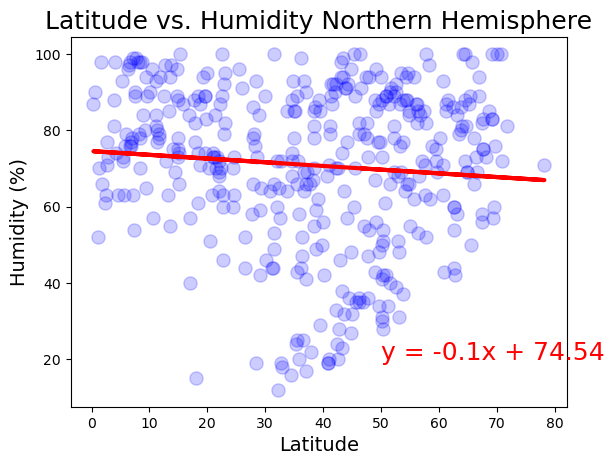

In [26]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("Latitude vs. Humidity Northern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig7_Lat_Humidity_NorthRegress.png")

The r-value is -0.010152036464545067


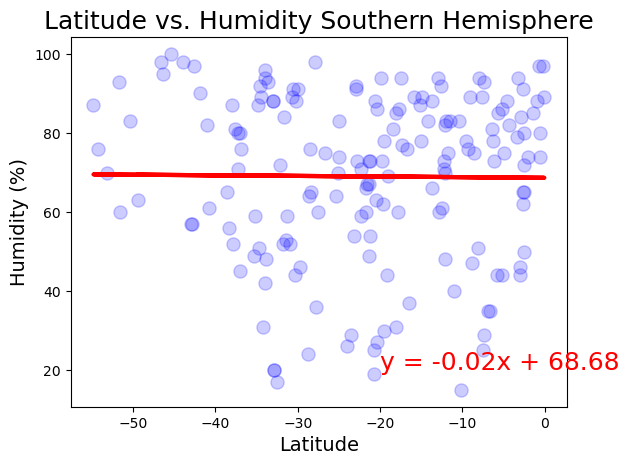

In [27]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("Latitude vs. Humidity Southern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig8_Lat_Humidity_SouthRegress.png")

**Discussion about the linear relationship:** Data and regression analysis showed poor correlation between latitude and humidity in either Northern or Soutehrn hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.030641708218242674


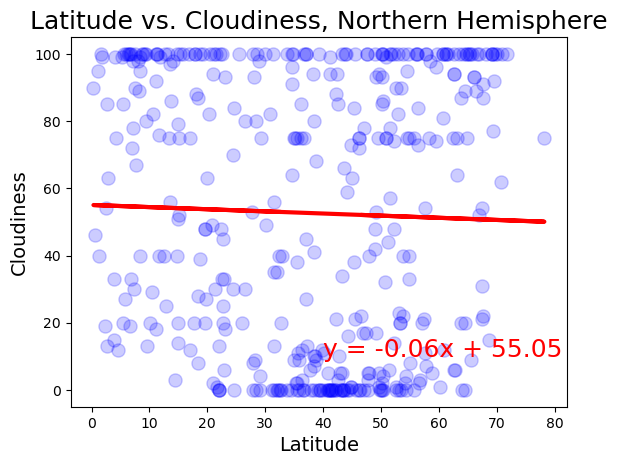

In [28]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.title("Latitude vs. Cloudiness, Northern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig9_Lat_Cloudiness_NorthRegress.png")

The r-value is 0.025162209856166816


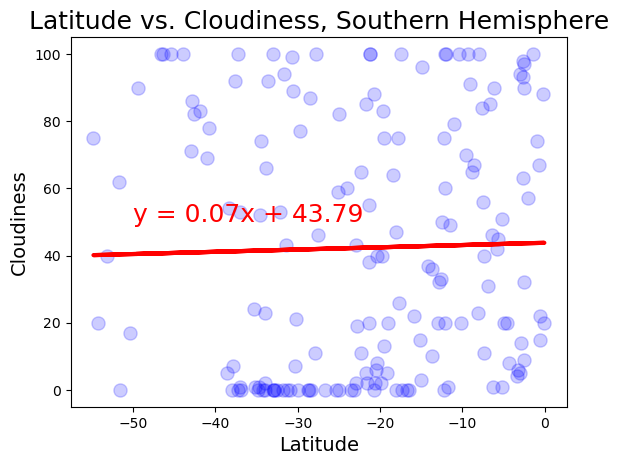

In [29]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.title("Latitude vs. Cloudiness, Southern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig10_Lat_Cloudiness_SouthRegress.png")

**Discussion about the linear relationship:** Data and regression analysis showed poor correlation between latitude and cloudiness in either Northern or Soutehrn hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.03523210039471657


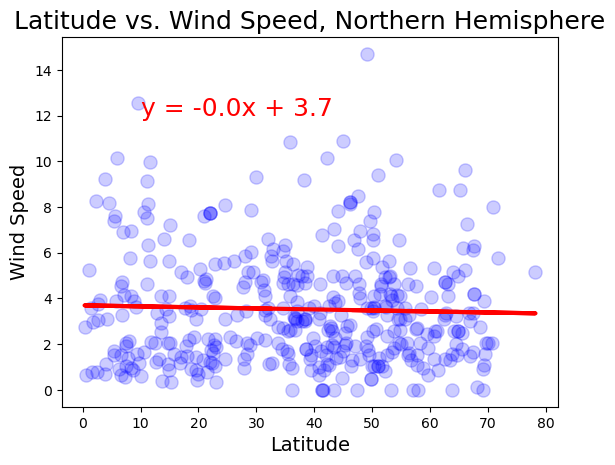

In [30]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 10, 12, "Wind Speed")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.title("Latitude vs. Wind Speed, Northern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig11_Lat_Windspeed_NorthRegress.png")

The r-value is -0.28137275826626046


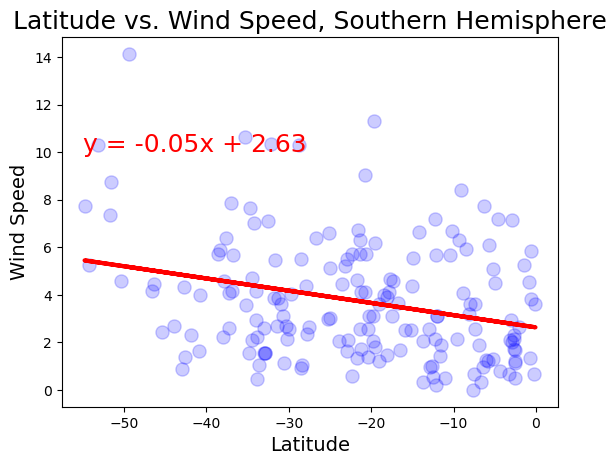

In [32]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 10, "Wind Speed")
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.title("Latitude vs. Wind Speed, Southern Hemisphere", fontsize=18)
plt.savefig("output_data/Fig12_Lat_Windspeed_SouthRegress.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** Data and regression analysis showed poor correlation between latitude and wind speed in Northern hemisphere. The correlation was stronger in Southern hemisphere compared to northern hemisphere.